# Data Preprocessing for Bouba Kiki Experiment

In [1]:
R.Version()

$platform
[1] "x86_64-apple-darwin13.4.0"

$arch
[1] "x86_64"

$os
[1] "darwin13.4.0"

$system
[1] "x86_64, darwin13.4.0"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.2"

$year
[1] "2021"

$month
[1] "11"

$day
[1] "01"

$`svn rev`
[1] "81115"

$language
[1] "R"

$version.string
[1] "R version 4.1.2 (2021-11-01)"

$nickname
[1] "Bird Hippie"

In [2]:
suppressPackageStartupMessages({
    library(supernova)
    library(Lock5withR)
    library(tidyverse)
    library(gridExtra)
    library(emmeans)
    library(dplyr)
})

In [3]:
FILENAME = 'ANONBouba-Kiki Experiment_May 29, 2021_18.47.csv'

In [4]:
bk = read_csv(FILENAME)

Rows: 156 Columns: 106
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (106): StartDate, EndDate, Status, IPAddress, Progress, Duration (in sec...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Overview of Uncleaned Data

In [5]:
str(bk)

spec_tbl_df [156 × 106] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ StartDate             : chr [1:156] "Start Date" "{\"ImportId\":\"startDate\",\"timeZone\":\"America/Denver\"}" "2021-05-08 19:17:23" "2021-05-08 19:25:35" ...
 $ EndDate               : chr [1:156] "End Date" "{\"ImportId\":\"endDate\",\"timeZone\":\"America/Denver\"}" "2021-05-08 19:17:53" "2021-05-08 19:25:54" ...
 $ Status                : chr [1:156] "Response Type" "{\"ImportId\":\"status\"}" "Survey Preview" "Survey Preview" ...
 $ IPAddress             : chr [1:156] "IP Address" "{\"ImportId\":\"ipAddress\"}" NA NA ...
 $ Progress              : chr [1:156] "Progress" "{\"ImportId\":\"progress\"}" "100" "100" ...
 $ Duration (in seconds) : chr [1:156] "Duration (in seconds)" "{\"ImportId\":\"duration\"}" "29" "19" ...
 $ Finished              : chr [1:156] "Finished" "{\"ImportId\":\"finished\"}" "TRUE" "TRUE" ...
 $ RecordedDate          : chr [1:156] "Recorded Date" "{\"ImportId\":\"recordedDate\",\"timeZone\"

In [6]:
glimpse(bk)

Rows: 156
Columns: 106
$ StartDate               <chr> "Start Date", "{\"ImportId\":\"startDate\",\"t…
$ EndDate                 <chr> "End Date", "{\"ImportId\":\"endDate\",\"timeZ…
$ Status                  <chr> "Response Type", "{\"ImportId\":\"status\"}", …
$ IPAddress               <chr> "IP Address", "{\"ImportId\":\"ipAddress\"}", …
$ Progress                <chr> "Progress", "{\"ImportId\":\"progress\"}", "10…
$ `Duration (in seconds)` <chr> "Duration (in seconds)", "{\"ImportId\":\"dura…
$ Finished                <chr> "Finished", "{\"ImportId\":\"finished\"}", "TR…
$ RecordedDate            <chr> "Recorded Date", "{\"ImportId\":\"recordedDate…
$ ResponseId              <chr> "Response ID", "{\"ImportId\":\"_recordId\"}",…
$ RecipientLastName       <chr> "Recipient Last Name", "{\"ImportId\":\"recipi…
$ RecipientFirstName      <chr> "Recipient First Name", "{\"ImportId\":\"recip…
$ RecipientEmail          <chr> "Recipient Email", "{\"ImportId\":\"recipientE…
$ ExternalReferen

## Select out first two rows
First two rows contain unnecessary question information

In [7]:
bk_clean = bk[-1,][-1,]

In [8]:
bk_clean

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Katakana2VoicelessKA_1,Katakana3VoicelessKA_1,Katakana4VoicelessKA_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,Fin.Attention Check
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-05-08 19:17:23,2021-05-08 19:17:53,Survey Preview,NA,100,29,TRUE,2021-05-08 19:17:53,R_2dT3Ofsts6CR5iC,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 19:25:35,2021-05-08 19:25:54,Survey Preview,NA,100,19,TRUE,2021-05-08 19:25:55,R_25FNbA7MElFxlX4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 20:34:09,2021-05-08 20:34:19,Survey Preview,NA,100,9,TRUE,2021-05-08 20:34:20,R_3hnnDopQJ8cDY0A,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 20:34:23,2021-05-08 20:34:56,Survey Preview,NA,100,33,TRUE,2021-05-08 20:34:57,R_3l8LnJEFgJPp8NH,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 20:39:46,2021-05-08 20:40:29,Survey Preview,NA,100,42,TRUE,2021-05-08 20:40:29,R_1o56wHdX1TOjhkm,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 20:40:31,2021-05-08 20:40:44,Survey Preview,NA,100,12,TRUE,2021-05-08 20:40:45,R_32KHt7IGHtnXscm,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 20:42:41,2021-05-08 20:42:55,IP Address,NA,100,13,TRUE,2021-05-08 20:42:55,R_3KpVmZhxB0BqJ8G,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-08 20:48:28,2021-05-08 20:48:31,Spam,NA,100,2,TRUE,2021-05-08 20:48:31,R_33mwmQjsR77vJ7y,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-09 19:18:49,2021-05-09 19:21:19,Survey Preview,NA,100,150,TRUE,2021-05-09 19:21:21,R_2Pb6rcSStyphgHX,NA,⋯,NA,NA,NA,Prefer not to say,Nonbinary/Third Gender,Middle Eastern or North African,NA,NA,NA,NA


## Filter out eligibility and final attention check

In [9]:
## get rid of invalid responses

bk_clean = bk_clean %>%
    filter(Status != 'Survey Preview') %>%
    filter(Status != 'Spam') %>%
    filter(Finished == 'TRUE')
bk_clean

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Katakana2VoicelessKA_1,Katakana3VoicelessKA_1,Katakana4VoicelessKA_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,Fin.Attention Check
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-05-08 20:42:41,2021-05-08 20:42:55,IP Address,NA,100,13,TRUE,2021-05-08 20:42:55,R_3KpVmZhxB0BqJ8G,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-14 14:07:04,2021-05-14 14:07:08,IP Address,NA,100,4,TRUE,2021-05-14 14:07:08,R_ugIgc8pxTgpD92V,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-14 14:05:58,2021-05-14 14:15:41,IP Address,NA,100,583,TRUE,2021-05-14 14:15:42,R_T6o11uSrXeAKWGd,NA,⋯,NA,NA,NA,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Paid close attention to all of the questions
2021-05-14 14:17:43,2021-05-14 14:23:30,IP Address,NA,100,346,TRUE,2021-05-14 14:23:31,R_w5cVooz6rKcHraN,NA,⋯,0,0,0,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Paid attention most of the time
2021-05-14 14:24:41,2021-05-14 14:30:31,IP Address,NA,100,350,TRUE,2021-05-14 14:30:32,R_Zwq93u18tGRk9Q5,NA,⋯,NA,NA,NA,Male,Male,Asian,"Chinese, English",NA,NA,Paid close attention to all of the questions
2021-05-14 14:56:45,2021-05-14 15:07:16,IP Address,NA,100,630,TRUE,2021-05-14 15:07:17,R_2vcUEVcdFMdf1Gg,NA,⋯,39.142,30.965,43.566,Male,Male,Asian,Mandarin,English,English,Paid attention most of the time
2021-05-14 15:20:10,2021-05-14 15:20:12,IP Address,NA,100,1,TRUE,2021-05-14 15:20:12,R_1DGPZyMahqAGrK1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2021-05-14 16:06:43,2021-05-14 16:12:44,IP Address,NA,100,360,TRUE,2021-05-14 16:12:44,R_1OwV76VqYNsafbi,NA,⋯,NA,NA,NA,Male,Male,Asian,"Chinese, English",Chinese,none,Paid attention most of the time
2021-05-14 16:04:35,2021-05-14 16:16:09,IP Address,NA,100,694,TRUE,2021-05-14 16:16:10,R_22LmhGX9A3KWxz9,NA,⋯,35.121,30.429,15.952,Male,Male,White,English,English,"English, Greek, Spanish",Paid close attention to all of the questions


In [10]:
## filter out eligibility

bk_clean = bk_clean %>%
## eligibility related
    filter(`Participant Consent` == 'Yes') %>%
    filter(English != 'Not Fluent English speaker') %>%
    filter(Q4 != 'I have significant exposure to Japanese (such as from speaking or writing)') %>%
    filter(Age != 'Under 18') %>%
    filter(`Hearing loss` != 'Yes, it is difficult for me to hear in my day to day life') %>%
    filter(Vision != 'Yes, it is difficult to see in my day to day life')
bk_clean

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Katakana2VoicelessKA_1,Katakana3VoicelessKA_1,Katakana4VoicelessKA_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,Fin.Attention Check
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-05-14 14:17:43,2021-05-14 14:23:30,IP Address,NA,100,346,TRUE,2021-05-14 14:23:31,R_w5cVooz6rKcHraN,NA,⋯,0,0,0,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Paid attention most of the time
2021-05-14 14:24:41,2021-05-14 14:30:31,IP Address,NA,100,350,TRUE,2021-05-14 14:30:32,R_Zwq93u18tGRk9Q5,NA,⋯,NA,NA,NA,Male,Male,Asian,"Chinese, English",NA,NA,Paid close attention to all of the questions
2021-05-14 16:04:35,2021-05-14 16:16:09,IP Address,NA,100,694,TRUE,2021-05-14 16:16:10,R_22LmhGX9A3KWxz9,NA,⋯,35.121,30.429,15.952,Male,Male,White,English,English,"English, Greek, Spanish",Paid close attention to all of the questions
2021-05-14 16:52:09,2021-05-14 17:07:54,IP Address,NA,100,944,TRUE,2021-05-14 17:07:54,R_25AcVxkj7FydEbd,NA,⋯,31.233,63.807,100,Male,Male,Asian,Chinese,Chinese，English,Chinese，English，Japenese,Paid attention most of the time
2021-05-14 17:19:15,2021-05-14 17:24:02,IP Address,NA,100,287,TRUE,2021-05-14 17:24:03,R_2dlQ128LVCfGH7w,NA,⋯,NA,NA,NA,Female,Female,Asian,"Chinese, English","Chinese, English",Spanish,Paid close attention to all of the questions
2021-05-14 17:57:51,2021-05-14 18:06:01,IP Address,NA,100,490,TRUE,2021-05-14 18:06:02,R_21btUt7XGynGchq,NA,⋯,NA,NA,NA,Male,Male,White,English,English,"English, Spanish",Paid attention most of the time
2021-05-14 18:57:55,2021-05-14 19:02:24,IP Address,NA,100,268,TRUE,2021-05-14 19:02:25,R_2Xdu8setKJhwyQY,NA,⋯,NA,NA,NA,Male,Male,Asian,English,Vietnamese,"Japanese, Spanish",Paid close attention to all of the questions
2021-05-14 19:04:31,2021-05-14 19:09:19,IP Address,NA,100,287,TRUE,2021-05-14 19:09:19,R_31RbLz3U9k9ebA8,NA,⋯,0,0,14.477,Female,Female,White,English,English,English,Paid close attention to all of the questions
2021-05-14 19:33:20,2021-05-14 19:45:19,IP Address,NA,100,718,TRUE,2021-05-14 19:45:20,R_4Jf3vUpU9R7Fvln,NA,⋯,NA,NA,NA,Female,Female,Asian,"english, spanish",italian,NA,Paid attention most of the time


In [11]:
bk_clean = bk_clean %>%
## environment related
    filter(Audio != "No, my device's audio system is not working")
bk_clean

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Katakana2VoicelessKA_1,Katakana3VoicelessKA_1,Katakana4VoicelessKA_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,Fin.Attention Check
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-05-14 14:17:43,2021-05-14 14:23:30,IP Address,NA,100,346,TRUE,2021-05-14 14:23:31,R_w5cVooz6rKcHraN,NA,⋯,0,0,0,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Paid attention most of the time
2021-05-14 14:24:41,2021-05-14 14:30:31,IP Address,NA,100,350,TRUE,2021-05-14 14:30:32,R_Zwq93u18tGRk9Q5,NA,⋯,NA,NA,NA,Male,Male,Asian,"Chinese, English",NA,NA,Paid close attention to all of the questions
2021-05-14 16:04:35,2021-05-14 16:16:09,IP Address,NA,100,694,TRUE,2021-05-14 16:16:10,R_22LmhGX9A3KWxz9,NA,⋯,35.121,30.429,15.952,Male,Male,White,English,English,"English, Greek, Spanish",Paid close attention to all of the questions
2021-05-14 16:52:09,2021-05-14 17:07:54,IP Address,NA,100,944,TRUE,2021-05-14 17:07:54,R_25AcVxkj7FydEbd,NA,⋯,31.233,63.807,100,Male,Male,Asian,Chinese,Chinese，English,Chinese，English，Japenese,Paid attention most of the time
2021-05-14 17:19:15,2021-05-14 17:24:02,IP Address,NA,100,287,TRUE,2021-05-14 17:24:03,R_2dlQ128LVCfGH7w,NA,⋯,NA,NA,NA,Female,Female,Asian,"Chinese, English","Chinese, English",Spanish,Paid close attention to all of the questions
2021-05-14 17:57:51,2021-05-14 18:06:01,IP Address,NA,100,490,TRUE,2021-05-14 18:06:02,R_21btUt7XGynGchq,NA,⋯,NA,NA,NA,Male,Male,White,English,English,"English, Spanish",Paid attention most of the time
2021-05-14 18:57:55,2021-05-14 19:02:24,IP Address,NA,100,268,TRUE,2021-05-14 19:02:25,R_2Xdu8setKJhwyQY,NA,⋯,NA,NA,NA,Male,Male,Asian,English,Vietnamese,"Japanese, Spanish",Paid close attention to all of the questions
2021-05-14 19:04:31,2021-05-14 19:09:19,IP Address,NA,100,287,TRUE,2021-05-14 19:09:19,R_31RbLz3U9k9ebA8,NA,⋯,0,0,14.477,Female,Female,White,English,English,English,Paid close attention to all of the questions
2021-05-14 19:33:20,2021-05-14 19:45:19,IP Address,NA,100,718,TRUE,2021-05-14 19:45:20,R_4Jf3vUpU9R7Fvln,NA,⋯,NA,NA,NA,Female,Female,Asian,"english, spanish",italian,NA,Paid attention most of the time


In [12]:
bk_clean = bk_clean %>%
## final attention check
    filter(`Fin.Attention Check` != 'Did not pay attention at all')
bk_clean

StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,⋯,Katakana2VoicelessKA_1,Katakana3VoicelessKA_1,Katakana4VoicelessKA_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,Fin.Attention Check
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021-05-14 14:17:43,2021-05-14 14:23:30,IP Address,NA,100,346,TRUE,2021-05-14 14:23:31,R_w5cVooz6rKcHraN,NA,⋯,0,0,0,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Paid attention most of the time
2021-05-14 14:24:41,2021-05-14 14:30:31,IP Address,NA,100,350,TRUE,2021-05-14 14:30:32,R_Zwq93u18tGRk9Q5,NA,⋯,NA,NA,NA,Male,Male,Asian,"Chinese, English",NA,NA,Paid close attention to all of the questions
2021-05-14 16:04:35,2021-05-14 16:16:09,IP Address,NA,100,694,TRUE,2021-05-14 16:16:10,R_22LmhGX9A3KWxz9,NA,⋯,35.121,30.429,15.952,Male,Male,White,English,English,"English, Greek, Spanish",Paid close attention to all of the questions
2021-05-14 16:52:09,2021-05-14 17:07:54,IP Address,NA,100,944,TRUE,2021-05-14 17:07:54,R_25AcVxkj7FydEbd,NA,⋯,31.233,63.807,100,Male,Male,Asian,Chinese,Chinese，English,Chinese，English，Japenese,Paid attention most of the time
2021-05-14 17:19:15,2021-05-14 17:24:02,IP Address,NA,100,287,TRUE,2021-05-14 17:24:03,R_2dlQ128LVCfGH7w,NA,⋯,NA,NA,NA,Female,Female,Asian,"Chinese, English","Chinese, English",Spanish,Paid close attention to all of the questions
2021-05-14 17:57:51,2021-05-14 18:06:01,IP Address,NA,100,490,TRUE,2021-05-14 18:06:02,R_21btUt7XGynGchq,NA,⋯,NA,NA,NA,Male,Male,White,English,English,"English, Spanish",Paid attention most of the time
2021-05-14 18:57:55,2021-05-14 19:02:24,IP Address,NA,100,268,TRUE,2021-05-14 19:02:25,R_2Xdu8setKJhwyQY,NA,⋯,NA,NA,NA,Male,Male,Asian,English,Vietnamese,"Japanese, Spanish",Paid close attention to all of the questions
2021-05-14 19:04:31,2021-05-14 19:09:19,IP Address,NA,100,287,TRUE,2021-05-14 19:09:19,R_31RbLz3U9k9ebA8,NA,⋯,0,0,14.477,Female,Female,White,English,English,English,Paid close attention to all of the questions
2021-05-14 19:33:20,2021-05-14 19:45:19,IP Address,NA,100,718,TRUE,2021-05-14 19:45:20,R_4Jf3vUpU9R7Fvln,NA,⋯,NA,NA,NA,Female,Female,Asian,"english, spanish",italian,NA,Paid attention most of the time


In [13]:
glimpse(bk_clean)

Rows: 51
Columns: 106
$ StartDate               <chr> "2021-05-14 14:17:43", "2021-05-14 14:24:41", …
$ EndDate                 <chr> "2021-05-14 14:23:30", "2021-05-14 14:30:31", …
$ Status                  <chr> "IP Address", "IP Address", "IP Address", "IP …
$ IPAddress               <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Progress                <chr> "100", "100", "100", "100", "100", "100", "100…
$ `Duration (in seconds)` <chr> "346", "350", "694", "944", "287", "490", "268…
$ Finished                <chr> "TRUE", "TRUE", "TRUE", "TRUE", "TRUE", "TRUE"…
$ RecordedDate            <chr> "2021-05-14 14:23:31", "2021-05-14 14:30:32", …
$ ResponseId              <chr> "R_w5cVooz6rKcHraN", "R_Zwq93u18tGRk9Q5", "R_2…
$ RecipientLastName       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ RecipientFirstName      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ RecipientEmail          <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ ExternalReferenc

## Get v+a

In [14]:
bk_a = bk_clean %>%
    select(
        English,
        Q4,
        `Hearing loss`,
        Vision,
        Audio,
        ##
        `Mid-study check A+V_1`,
        ##
        ResponseId,
        Hiragana1VoicedGA_1,
        Hiragana2VoicedGA_1,
        Hiragana3VoicedGA_1,
        Hiragana4VoicedGA_1,
        Katakana1VoicedGA_1,
        Katakana2VoicedGA_1,
        Katakana3VoicedGA_1,
        Katakana4VoicedGA_1,
        Hiragana1VoicedZA_1,
        Hiragana2VoicedZA_1,
        Hiragana3VoicedZA_1,
        Hiragana4VoicedZA_1,
        Katakana1VoicedZA_1,
        Katakana2VoicedZA_1,
        Katakana3VoicedZA_1,
        Katakana4VoicedZA_1,
        Hiragana1VoicelessSA_1,
        Hiragana2VoicelessSA_1,
        Hiragana3VoicelessSA_1,
        Hiragana4VoicelessSA_1,
        Katagana1VoicelessSA_1,
        Katakana2VoicelessSA_1,
        Katakana3VoicelessSA_1,
        Katakana4VoicelessSA_1,
        Hiragana1VoicelessKA_1,
        Hiragana2VoicelessKA_1,
        Hiragana3VoicelessKA_1,
        Hiragana4VoicelessKA_1,
        Katagana1VoicelessKA_1,
        Katakana2VoicelessKA_1,
        Katakana3VoicelessKA_1,
        Katakana4VoicelessKA_1,
        ##
        Sex,
        Gender,
        Ethnicity,
        `Languages 1`,
        `Languages 2`,
        `Languages 3`
    )

In [15]:
bk_a

English,Q4,Hearing loss,Vision,Audio,Mid-study check A+V_1,ResponseId,Hiragana1VoicedGA_1,Hiragana2VoicedGA_1,Hiragana3VoicedGA_1,⋯,Katagana1VoicelessKA_1,Katakana2VoicelessKA_1,Katakana3VoicelessKA_1,Katakana4VoicelessKA_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,68.231,100,61.93,⋯,0,0,0,0,Male,Male,Asian,"Cantonese, Mandarin",NA,German
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",NA,R_Zwq93u18tGRk9Q5,NA,NA,NA,⋯,NA,NA,NA,NA,Male,Male,Asian,"Chinese, English",NA,NA
Native English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_22LmhGX9A3KWxz9,60.322,60.858,50.536,⋯,23.324,35.121,30.429,15.952,Male,Male,White,English,English,"English, Greek, Spanish"
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using my device's speaker",0,R_25AcVxkj7FydEbd,100,60.858,56.434,⋯,100,31.233,63.807,100,Male,Male,Asian,Chinese,Chinese，English,Chinese，English，Japenese
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using my device's speaker",NA,R_2dlQ128LVCfGH7w,NA,NA,NA,⋯,NA,NA,NA,NA,Female,Female,Asian,"Chinese, English","Chinese, English",Spanish
Native English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using my device's speaker",NA,R_21btUt7XGynGchq,NA,NA,NA,⋯,NA,NA,NA,NA,Male,Male,White,English,English,"English, Spanish"
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",NA,R_2Xdu8setKJhwyQY,NA,NA,NA,⋯,NA,NA,NA,NA,Male,Male,Asian,English,Vietnamese,"Japanese, Spanish"
Native English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using my device's speaker",0,R_31RbLz3U9k9ebA8,72.922,100,100,⋯,10.992,0,0,14.477,Female,Female,White,English,English,English
Native English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using my device's speaker",NA,R_4Jf3vUpU9R7Fvln,NA,NA,NA,⋯,NA,NA,NA,NA,Female,Female,Asian,"english, spanish",italian,NA


In [16]:
## convert into usable longform data
bk_a_long = bk_a %>%
    pivot_longer(
        cols = Hiragana1VoicedGA_1:Katakana4VoicelessKA_1,
        names_to = c('japShape', 'japShapeN', 'phonemeType', 'phoneme'),
        names_pattern = "(........)(.)(.*)(..)_1",
        values_to = 'match',
        values_drop_na = TRUE
    )
bk_a_long

English,Q4,Hearing loss,Vision,Audio,Mid-study check A+V_1,ResponseId,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,japShape,japShapeN,phonemeType,phoneme,match
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,1,Voiced,GA,68.231
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,2,Voiced,GA,100
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,3,Voiced,GA,61.93
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,4,Voiced,GA,30.161
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,1,Voiced,GA,23.727
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,2,Voiced,GA,63.941
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,3,Voiced,GA,28.552
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,4,Voiced,GA,0
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,1,Voiced,ZA,54.96


## get all visual only

In [17]:
bk_v = bk_clean %>%
    select(
        English,
        Q4,
        `Hearing loss`,
        Vision,
        Audio,
        ##
        `Mid-study Check V_1`,
        ##
        ResponseId,
        H1_4_1,
        H2_4_1,
        H3_4_1,
        H4_4_1,
        K1_4_1,
        K2_4_1,
        K3_4_1,
        K4_4_1,
        H1_3_1,
        H2_3_1,
        H3_3_1,
        H4_3_1,
        K1_3_1,
        K2_3_1,
        K3_3_1,
        K4_3_1,
        H1_1_1,
        H2_1_1,
        H3_1_1,
        H4_1_1,
        K1_1_1,
        K2_1_1,
        K3_1_1,
        K4_1_1,
        H1_2_1,
        H2_2_1,
        H3_2_1,
        H4_2_1,
        K1_2_1,
        K2_2_1,
        K3_2_1,
        K4_2_1,
        ##
        Sex,
        Gender,
        Ethnicity,
        `Languages 1`,
        `Languages 2`,
        `Languages 3`
    )

bk_v[!is.na(bk_v$`Mid-study Check V_1`),]

English,Q4,Hearing loss,Vision,Audio,Mid-study Check V_1,ResponseId,H1_4_1,H2_4_1,H3_4_1,⋯,K1_2_1,K2_2_1,K3_2_1,K4_2_1,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",0,R_Zwq93u18tGRk9Q5,71.984,81.099,82.842,⋯,38.338,23.324,29.759,14.745,Male,Male,Asian,"Chinese, English",NA,NA
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using my device's speaker",0,R_2dlQ128LVCfGH7w,35.657,65.013,29.088,⋯,34.45,20.509,36.327,31.099,Female,Female,Asian,"Chinese, English","Chinese, English",Spanish
Native English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using my device's speaker",0,R_21btUt7XGynGchq,78.954,79.357,76.005,⋯,31.501,38.472,33.646,32.44,Male,Male,White,English,English,"English, Spanish"
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_2Xdu8setKJhwyQY,100,100,100,⋯,0,0,0,0,Male,Male,Asian,English,Vietnamese,"Japanese, Spanish"
Native English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using my device's speaker",0,R_4Jf3vUpU9R7Fvln,54.155,55.63,55.898,⋯,52.681,19.437,41.823,45.845,Female,Female,Asian,"english, spanish",italian,NA
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_3NLhguo9cutdHDi,80.697,71.984,87.668,⋯,0,10.992,29.223,0,Male,Male,2 or more ethnicities/races,english arabic,french,NA
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using my device's speaker",0,R_2sduI0rUEQlACn2,63.807,80.161,79.625,⋯,39.812,16.756,37.131,14.343,Female,Female,Asian,Chinese,English,Korean
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using my device's speaker",0,R_3J2SZ9NoGj2GswE,62.198,70.241,59.92,⋯,33.512,37.668,36.059,13.003,Female,Female,Asian,Indonesian,Spanish,"Spanish, Swedish, Urdu, Arabic"
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",0,R_2DZzYJVx54OwM8U,58.713,60.188,53.217,⋯,21.85,24.531,42.091,12.735,Male,Male,White,"Dutch, English",NA,Turkish


In [18]:
#convert into longform data
bk_v_long = bk_v %>%
    pivot_longer(
        cols = H1_4_1:K4_2_1,
        names_to = c('japShape', 'japShapeN', 'phonemeType', 'phoneme'),
        names_pattern = "(.)(.)(.*)()*",
        values_to = 'match',
        values_drop_na = TRUE
    )

# Getting ready to merge

In [19]:
## for audiovisual condition

## check embedded attention check
bk_a_long = bk_a_long %>%
    filter(`Mid-study check A+V_1` == 0)

## give condition name
bk_a_long$cond = 'Audio + Visual'

## recode erroneous characters
bk_a_long$japShape = bk_a_long$japShape %>%
    recode('Katagana' = 'Katakana')

## turn everything into factors
bk_a_long$japShape = factor(bk_a_long$japShape)
bk_a_long$japShapeN = factor(bk_a_long$japShapeN)
bk_a_long$phonemeType = factor(bk_a_long$phonemeType)
bk_a_long$phoneme = factor(bk_a_long$phoneme)
bk_a_long$match = as.numeric(bk_a_long$match)

## drop attention check
bk_a_long = subset(bk_a_long, select = -c(`Mid-study check A+V_1`))

In [20]:
## for visual only condition

## check embedded attention check
bk_v_long = bk_v_long %>%
    filter(`Mid-study Check V_1` == 0)

bk_v_long$cond = 'Visual Only'
bk_v_long$phonemeType = 'N/A'
bk_v_long$phoneme = 'N/A'

## turn everything into factors
bk_v_long$japShape = factor(bk_v_long$japShape)

bk_v_long$japShapeN = factor(bk_v_long$japShapeN)
bk_v_long$phonemeType = factor(bk_v_long$phonemeType)
bk_v_long$phoneme = factor(bk_v_long$phoneme)
bk_v_long$match = as.numeric(bk_v_long$match)

## drop attention check
bk_v_long = subset(bk_v_long, select = -c(`Mid-study Check V_1`))

In [21]:
bk_a_long

English,Q4,Hearing loss,Vision,Audio,ResponseId,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,japShape,japShapeN,phonemeType,phoneme,match,cond
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,1,Voiced,GA,68.231,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,2,Voiced,GA,100.000,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,3,Voiced,GA,61.930,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,4,Voiced,GA,30.161,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,1,Voiced,GA,23.727,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,2,Voiced,GA,63.941,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,3,Voiced,GA,28.552,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,4,Voiced,GA,0.000,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,1,Voiced,ZA,54.960,Audio + Visual


In [22]:
bk_v_long

English,Q4,Hearing loss,Vision,Audio,ResponseId,Sex,Gender,Ethnicity,Languages 1,Languages 2,Languages 3,japShape,japShapeN,phonemeType,phoneme,match,cond
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,H,1,N/A,N/A,71.984,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,H,2,N/A,N/A,81.099,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,H,3,N/A,N/A,82.842,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,H,4,N/A,N/A,77.078,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,K,1,N/A,N/A,68.767,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,K,2,N/A,N/A,26.810,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,K,3,N/A,N/A,22.922,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,K,4,N/A,N/A,12.735,Visual Only
Fluent Non-English speaker,I have little or no exposure to Japanese,"No, I do not suffer from any hearing impairments","No, I do not suffer from any type of vision loss","Yes, I am using headphones",R_Zwq93u18tGRk9Q5,Male,Male,Asian,"Chinese, English",NA,NA,H,1,N/A,N/A,100.000,Visual Only


## Add two conditions together

In [23]:
bk_cleaned = rbind(data.frame(bk_a_long), data.frame(bk_v_long))

In [24]:
bk_cleaned

English,Q4,Hearing.loss,Vision,Audio,ResponseId,Sex,Gender,Ethnicity,Languages.1,Languages.2,Languages.3,japShape,japShapeN,phonemeType,phoneme,match,cond
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,1,Voiced,GA,68.231,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,2,Voiced,GA,100.000,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,3,Voiced,GA,61.930,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,4,Voiced,GA,30.161,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,1,Voiced,GA,23.727,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,2,Voiced,GA,63.941,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,3,Voiced,GA,28.552,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Katakana,4,Voiced,GA,0.000,Audio + Visual
Fluent Non-English speaker,"I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it","No, I do not suffer from any hearing impairments","No, I am able to see with visual aids, such glasses or contacts","Yes, I am using headphones",R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Hiragana,1,Voiced,ZA,54.960,Audio + Visual


## Clean up demographic info

In [25]:
bk_cleaned = bk_cleaned %>%
    rename(
        .,
        `English` = 'English',
        'JapExposure' = `Q4`, 
        'Hearing' = `Hearing.loss`, 
        `Vision` = 'Vision',
        `Audio` = 'Audio',
        'FluentLan' = `Languages.1`,
        'ProficientLan' = `Languages.2`,
        'ExposedLan' = `Languages.3`
    )

In [26]:
## recode items
bk_cleaned$English = bk_cleaned$English %>%
    recode_factor(`Native English speaker` = 'Native', `Fluent Non-English speaker` = 'Fluent')

bk_cleaned$JapExposure = bk_cleaned$JapExposure %>%
    recode_factor(`I have some exposure to Japanese (such as through anime or J-pop), but have never systematically learned it` = 'Some', `I have little or no exposure to Japanese` = 'Little to None')

bk_cleaned$Hearing = bk_cleaned$Hearing %>%
    recode_factor(`No, I do not suffer from any hearing impairments` = 'None', `No, I am able to hear with a hearing aid or other method` = 'Corrected')

bk_cleaned$Vision = bk_cleaned$Vision %>%
    recode_factor(`No, I am able to see with visual aids, such glasses or contacts` = 'Corrected', `No, I do not suffer from any type of vision loss` = 'None')

bk_cleaned$Audio = bk_cleaned$Audio %>%
    recode_factor(`Yes, I am using headphones` = 'Headphone', `Yes, I am using my device\'s speaker` = 'Speaker')

bk_cleaned$japShape = bk_cleaned$japShape %>%
    recode_factor(`H` = 'Hiragana', `K` = 'Katakana')

bk_cleaned$japShape = bk_cleaned$japShape %>%
    recode_factor(`Hiragana` = 'Round\nLettering', `Katakana` = 'Angular\nLettering')

In [27]:
bk_cleaned

English,JapExposure,Hearing,Vision,Audio,ResponseId,Sex,Gender,Ethnicity,FluentLan,ProficientLan,ExposedLan,japShape,japShapeN,phonemeType,phoneme,match,cond
<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,1,Voiced,GA,68.231,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,2,Voiced,GA,100.000,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,3,Voiced,GA,61.930,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,4,Voiced,GA,30.161,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Angular Lettering,1,Voiced,GA,23.727,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Angular Lettering,2,Voiced,GA,63.941,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Angular Lettering,3,Voiced,GA,28.552,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Angular Lettering,4,Voiced,GA,0.000,Audio + Visual
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,1,Voiced,ZA,54.960,Audio + Visual


# Participant Breakdown

In [28]:
TRIAL_AMT = 32

In [29]:
length(unique(bk_cleaned$ResponseId)) ## number of unique participants

[1] 51

In [30]:
table(bk_cleaned$cond)/TRIAL_AMT


Audio + Visual    Visual Only 
            23             28 

In [31]:
table(bk_cleaned$English)/TRIAL_AMT


Native Fluent 
    30     21 

In [32]:
table(bk_cleaned$Sex)/TRIAL_AMT


Female   Male 
    22     29 

In [33]:
table(bk_cleaned$Gender)/TRIAL_AMT


                Female   Gender Nonconforming                   Male 
                    19                      2                     29 
Nonbinary/Third Gender 
                     1 

In [34]:
table(bk_cleaned$Ethnicity)/TRIAL_AMT


2 or more ethnicities/races                       Asian 
                          3                          20 
         Hispanic or Latino           Prefer not to say 
                          1                           1 
                      White 
                         26 

## preliminary visualizations

In [35]:
bk_cleaned_v = filter(bk_cleaned, cond == 'Visual Only')

In [36]:
bk_cleaned_v$engShape = 'None'
bk_cleaned_v$congruent = 'N/A'

japShape,mean
<fct>,<dbl>
Round Lettering,65.67935
Angular Lettering,32.63169


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



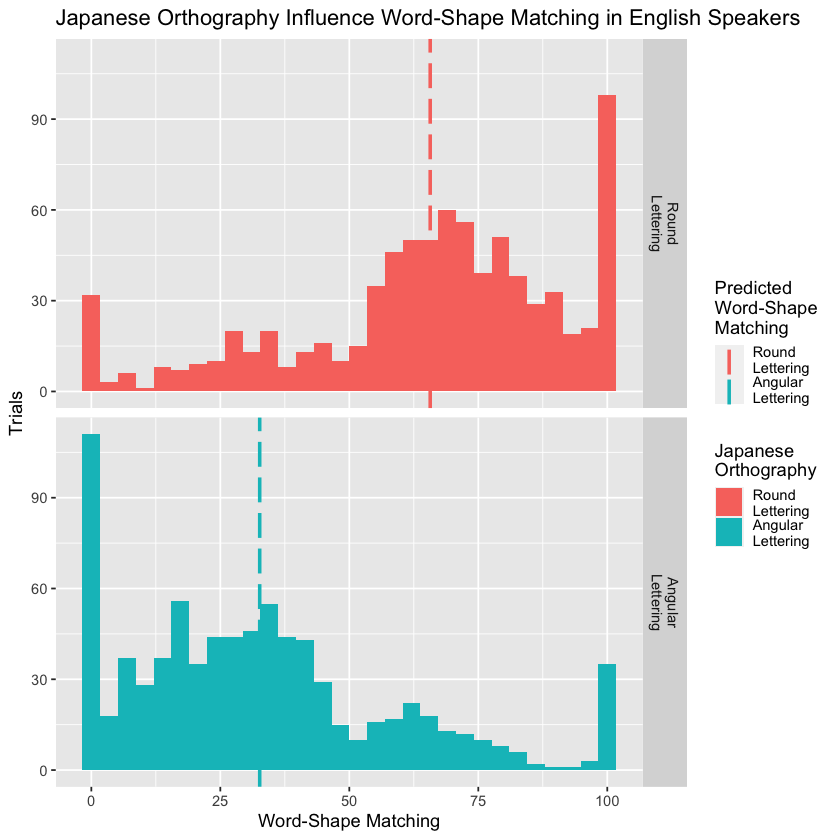

In [37]:
mean_bk = bk_cleaned %>%
    group_by(`japShape`) %>%
    summarize(mean = mean(match))

mean_bk

bk_cleaned %>%
    ggplot(aes(x = match, fill = japShape)) +
    geom_histogram() +
    facet_grid(japShape~.) +
    #scale_color_manual(values = colsc) +
    #scale_fill_manual(values = colsf) +
geom_vline(data = mean_bk, aes(xintercept = mean, color = japShape), linetype = 'longdash', size = 1) +
    labs(title = 'Japanese Orthography Influence Word-Shape Matching in English Speakers', x = "Word-Shape Matching", y = "Trials", fill = "Japanese\nOrthography", color = "Predicted \nWord-Shape\nMatching")

## make congruency and engShape variables

In [38]:
bk_hc = bk_cleaned %>%
    filter(japShape == 'Round\nLettering', phonemeType == 'Voiced')
bk_kc = bk_cleaned %>%
    filter(japShape == 'Angular\nLettering', phonemeType == 'Voiceless')
bk_hi = bk_cleaned %>%
    filter(japShape == 'Round\nLettering', phonemeType == 'Voiceless')
bk_ki = bk_cleaned %>%
    filter(japShape == 'Angular\nLettering', phonemeType == 'Voiced')

In [39]:
bk_hc$congruent = 'congruent'
bk_kc$congruent = 'congruent'
bk_hi$congruent = 'incongruent'
bk_ki$congruent = 'incongruent'

In [40]:
bk_cleaned_av = rbind(bk_hc, bk_kc, bk_hi, bk_ki)

In [41]:
bk_cleaned_av

English,JapExposure,Hearing,Vision,Audio,ResponseId,Sex,Gender,Ethnicity,FluentLan,ProficientLan,ExposedLan,japShape,japShapeN,phonemeType,phoneme,match,cond,congruent
<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,1,Voiced,GA,68.231,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,2,Voiced,GA,100.000,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,3,Voiced,GA,61.930,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,4,Voiced,GA,30.161,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,1,Voiced,ZA,54.960,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,2,Voiced,ZA,53.217,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,3,Voiced,ZA,53.887,Audio + Visual,congruent
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,4,Voiced,ZA,38.874,Audio + Visual,congruent
Native,Little to None,None,Corrected,Headphone,R_22LmhGX9A3KWxz9,Male,Male,White,English,English,"English, Greek, Spanish",Round Lettering,1,Voiced,GA,60.322,Audio + Visual,congruent


In [42]:
bk_GA = bk_cleaned_av %>%
    filter(phoneme == 'GA')
bk_KA = bk_cleaned_av %>%
    filter(phoneme == 'KA')
bk_SA = bk_cleaned_av %>%
    filter(phoneme == 'SA')
bk_ZA = bk_cleaned_av %>%
    filter(phoneme == 'ZA')

In [43]:
bk_GA$engShape = 'Round Lettering'
bk_KA$engShape = 'Angular Lettering'
bk_SA$engShape = 'Round Lettering'
bk_ZA$engShape = 'Angular Lettering'

In [44]:
bk_cleaned_av = rbind(bk_GA, bk_KA, bk_SA, bk_ZA)

In [45]:
bk_cleaned_av$engShape = bk_cleaned_av$engShape %>%
    factor(c('Round Lettering', 'Angular Lettering'))

In [46]:
bk_cleaned_av

English,JapExposure,Hearing,Vision,Audio,ResponseId,Sex,Gender,Ethnicity,FluentLan,ProficientLan,ExposedLan,japShape,japShapeN,phonemeType,phoneme,match,cond,congruent,engShape
<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>,<chr>,<fct>
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,1,Voiced,GA,68.231,Audio + Visual,congruent,Round Lettering
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,2,Voiced,GA,100.000,Audio + Visual,congruent,Round Lettering
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,3,Voiced,GA,61.930,Audio + Visual,congruent,Round Lettering
Fluent,Some,None,Corrected,Headphone,R_w5cVooz6rKcHraN,Male,Male,Asian,"Cantonese, Mandarin",NA,German,Round Lettering,4,Voiced,GA,30.161,Audio + Visual,congruent,Round Lettering
Native,Little to None,None,Corrected,Headphone,R_22LmhGX9A3KWxz9,Male,Male,White,English,English,"English, Greek, Spanish",Round Lettering,1,Voiced,GA,60.322,Audio + Visual,congruent,Round Lettering
Native,Little to None,None,Corrected,Headphone,R_22LmhGX9A3KWxz9,Male,Male,White,English,English,"English, Greek, Spanish",Round Lettering,2,Voiced,GA,60.858,Audio + Visual,congruent,Round Lettering
Native,Little to None,None,Corrected,Headphone,R_22LmhGX9A3KWxz9,Male,Male,White,English,English,"English, Greek, Spanish",Round Lettering,3,Voiced,GA,50.536,Audio + Visual,congruent,Round Lettering
Native,Little to None,None,Corrected,Headphone,R_22LmhGX9A3KWxz9,Male,Male,White,English,English,"English, Greek, Spanish",Round Lettering,4,Voiced,GA,72.386,Audio + Visual,congruent,Round Lettering
Fluent,Some,None,Corrected,Speaker,R_25AcVxkj7FydEbd,Male,Male,Asian,Chinese,Chinese，English,Chinese，English，Japenese,Round Lettering,1,Voiced,GA,100.000,Audio + Visual,congruent,Round Lettering


In [47]:
bk_cleaned_avv = rbind(bk_cleaned_av, bk_cleaned_v)

# Main visuals

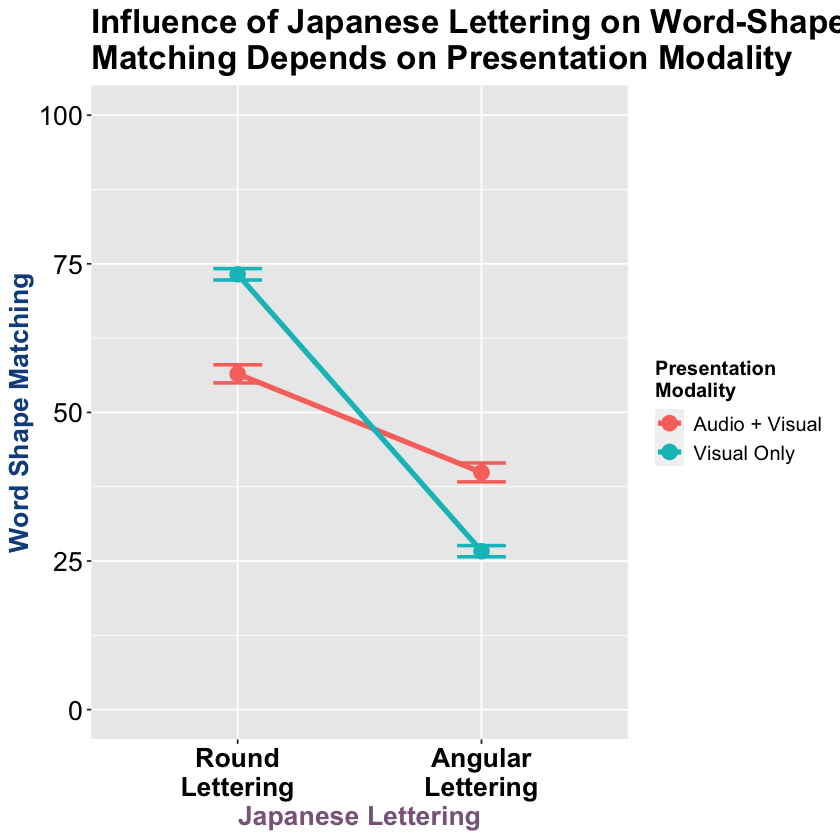

In [48]:
bk_cleaned %>%
    ggplot(aes(y = match, x = japShape, color = cond))+
    stat_summary(fun = mean, geom = "point", size = 4) +
theme(axis.text.x = element_text(size = 16, face = 'bold', color = 'black'),
     axis.text.y = element_text(size = 16, color = 'black'))+
theme(axis.title.x = element_text(size=16, face="bold", color = "plum4"),
     axis.title.y = element_text(size=16, face="bold", color = "dodgerblue4"))+
    stat_summary(fun = mean, geom = "line", size = 1.5, aes(group = cond)) +
    stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1)+
    labs(x = "Japanese Lettering", y = "Word Shape Matching", col = 'Presentation\nModality', title = 'Influence of Japanese Lettering on Word-Shape \nMatching Depends on Presentation Modality') +
    ylim(0,100)+
theme(legend.text=element_text(size=12, color = 'black'))+
theme(legend.title=element_text(size=12, face = 'bold', color = 'black'))+ theme(plot.title = element_text(size=20, color = 'black', face = 'bold'
                                                                                                ))

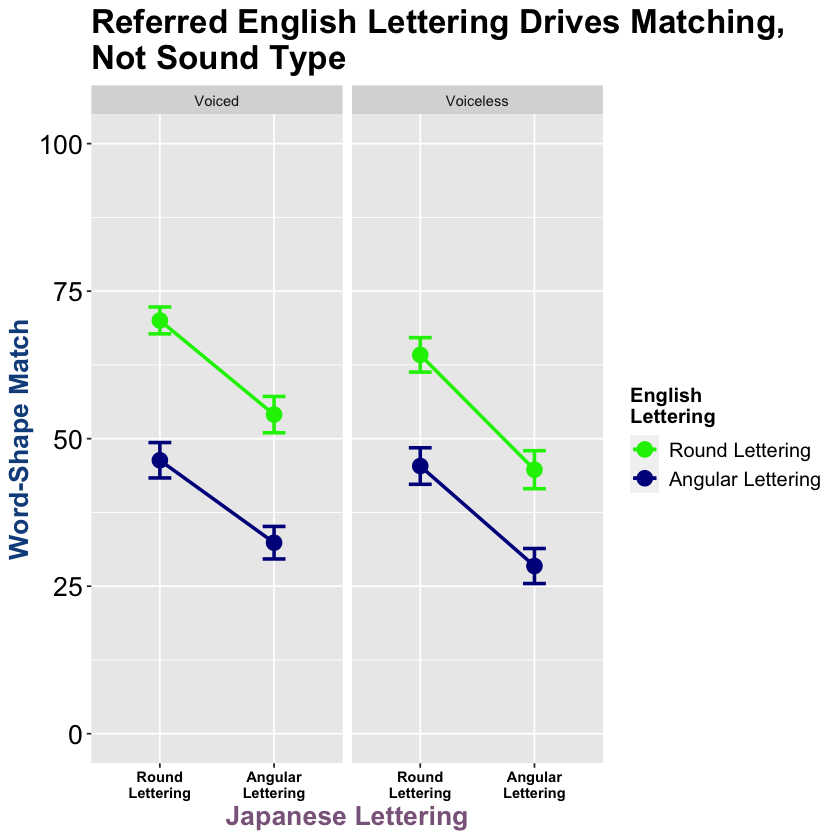

In [49]:
bk_cleaned_av %>%
    ggplot(aes(y = match, x = japShape, color = engShape))+
theme(axis.text.x = element_text(face = 'bold', color = 'black'),
     axis.text.y = element_text(size = 16, color = 'black'))+
theme(axis.title.x = element_text(size=16, face="bold", color = "plum4"),
     axis.title.y = element_text(size=16, face="bold", color = "dodgerblue4"))+
    stat_summary(fun = mean, geom = "point", size = 4) +
    stat_summary(fun = mean, geom = "line", size = 1, aes(group = engShape)) +
    ylim(0, 100)+
    facet_grid(~phonemeType)+
    scale_color_manual(values = c('green2', 'darkblue'))+
    stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.2, size = 1)+
    labs(x = 'Japanese Lettering', y = 'Word-Shape Match', color = 'English \nLettering', title = 'Referred English Lettering Drives Matching,\nNot Sound Type')+
theme(legend.text=element_text(size=12, color = 'black'))+
theme(legend.title=element_text(size=12, face = 'bold', color = 'black'))+ theme(plot.title = element_text(size=20, color = 'black', face = 'bold'
                                                                                                ))

# Formal Analysis

## Main

In [50]:
bk_main = summary(aov(match ~ japShape * cond + Error(ResponseId/japShape), data = bk_cleaned))

In [51]:
bk_main = aov(match ~ japShape * cond + Error(ResponseId/japShape), data = bk_cleaned)

In [52]:
bk_main


Call:
aov(formula = match ~ japShape * cond + Error(ResponseId/japShape), 
    data = bk_cleaned)

Grand Mean: 49.15552

Stratum 1: ResponseId

Terms:
                     cond Residuals
Sum of Squares    1234.85 102282.84
Deg. of Freedom         1        49

Residual standard error: 45.68813
1 out of 2 effects not estimable
Estimated effects are balanced

Stratum 2: ResponseId:japShape

Terms:
                japShape japShape:cond Residuals
Sum of Squares  445596.3       90836.8  171833.2
Deg. of Freedom        1             1        49

Residual standard error: 59.21824
Estimated effects may be unbalanced

Stratum 3: Within

Terms:
                Residuals
Sum of Squares   738875.5
Deg. of Freedom      1530

Residual standard error: 21.97556

In [53]:
bk_cleaned %>%
    group_by(japShape) %>%
    summarize(mean(match))

japShape,mean(match)
<fct>,<dbl>
Round Lettering,65.67935
Angular Lettering,32.63169


## Confint

In [54]:
joint_tests(bk_main, by = 'japShape')

emmeans(bk_main, 'japShape', 'cond')

Note: re-fitting model with sum-to-zero contrasts



,model term,japShape,df1,df2,F.ratio,p.value
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,cond,Round Lettering,1,92.07,20.245,1.986584e-05
2,cond,Angular Lettering,1,92.07,12.672,5.894787e-04


Note: re-fitting model with sum-to-zero contrasts



cond = Audio + Visual:
  japShape          emmean   SE df lower.CL upper.CL
 Round\nLettering     56.6 2.71 90     51.2     62.0
 Angular\nLettering   40.0 2.71 90     34.6     45.4

cond = Visual Only:
  japShape          emmean   SE df lower.CL upper.CL
 Round\nLettering     73.3 2.55 94     68.3     78.4
 Angular\nLettering   26.7 2.55 94     21.7     31.8

Confidence level used: 0.95 

## Exploratory Analysis

In [55]:
model_av_no = aov(match ~ japShape * phonemeType * engShape  + Error(ResponseId/(japShape * phonemeType * engShape)), data = bk_cleaned_av)

In [56]:
summary(model_av_no)


Error: ResponseId
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 22  84324    3833               

Error: ResponseId:japShape
          Df Sum Sq Mean Sq F value  Pr(>F)   
japShape   1  50608   50608   14.13 0.00108 **
Residuals 22  78801    3582                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: ResponseId:phonemeType
            Df Sum Sq Mean Sq F value Pr(>F)  
phonemeType  1   4650    4650     3.3 0.0829 .
Residuals   22  30998    1409                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: ResponseId:engShape
          Df Sum Sq Mean Sq F value   Pr(>F)    
engShape   1  74653   74653   15.69 0.000663 ***
Residuals 22 104667    4758                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: ResponseId:japShape:phonemeType
                     Df Sum Sq Mean Sq F value Pr(>F)
japShape:phonemeType  1    482   482.2   1.787  0.195
Residuals            22   5935

In [57]:
joint_tests(model_av_no)

emmeans(model_av_no, c('japShape'))
pairs(emmeans(model_av_no, c('japShape')), infer = c(TRUE, TRUE))

emmeans(model_av_no, c('phonemeType'))
pairs(emmeans(model_av_no, c('phonemeType')), infer = c(TRUE, TRUE))

emmeans(model_av_no, c('engShape'))
pairs(emmeans(model_av_no, c('engShape')), infer = c(TRUE, TRUE))

Note: re-fitting model with sum-to-zero contrasts



,model term,df1,df2,F.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,japShape,1,22,14.129,0.0010840574
5,phonemeType,1,22,3.300,0.0829206038
7,engShape,1,22,15.691,0.0006629061
2,japShape:phonemeType,1,22,1.787,0.1949071851
4,japShape:engShape,1,22,0.954,0.3393631603
6,phonemeType:engShape,1,22,0.451,0.5089026468
3,japShape:phonemeType:engShape,1,22,0.014,0.9073372786


Note: re-fitting model with sum-to-zero contrasts

NOTE: Results may be misleading due to involvement in interactions



  japShape          emmean   SE df lower.CL upper.CL
 Round\nLettering     56.5 3.17 44     50.1     62.9
 Angular\nLettering   39.9 3.17 44     33.5     46.3

Results are averaged over the levels of: phonemeType, engShape 
Confidence level used: 0.95 

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results may be misleading due to involvement in interactions



   contrast                            estimate   SE df lower.CL upper.CL
 Round\nLettering - Angular\nLettering     16.6 4.41 22     7.43     25.7
 t.ratio p.value
   3.759  0.0011

Results are averaged over the levels of: phonemeType, engShape 
Confidence level used: 0.95 

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results may be misleading due to involvement in interactions



 phonemeType emmean   SE   df lower.CL upper.CL
 Voiced        50.7 2.67 36.2     45.3     56.1
 Voiceless     45.7 2.67 36.2     40.3     51.1

Results are averaged over the levels of: japShape, engShape 
Confidence level used: 0.95 

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results may be misleading due to involvement in interactions



 contrast           estimate   SE df lower.CL upper.CL t.ratio p.value
 Voiced - Voiceless     5.03 2.77 22   -0.712     10.8   1.817  0.0829

Results are averaged over the levels of: japShape, engShape 
Confidence level used: 0.95 

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results may be misleading due to involvement in interactions



 engShape          emmean   SE   df lower.CL upper.CL
 Round Lettering     58.3 3.42 43.5     51.4     65.2
 Angular Lettering   38.1 3.42 43.5     31.2     45.0

Results are averaged over the levels of: japShape, phonemeType 
Confidence level used: 0.95 

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results may be misleading due to involvement in interactions



 contrast                            estimate   SE df lower.CL upper.CL t.ratio
 Round Lettering - Angular Lettering     20.1 5.08 22      9.6     30.7   3.961
 p.value
  0.0007

Results are averaged over the levels of: japShape, phonemeType 
Confidence level used: 0.95 

In [58]:
joint_tests(model_av_no)
emmeans(model_av_no, c('japShape', 'phonemeType', 'engShape'))

Note: re-fitting model with sum-to-zero contrasts



,model term,df1,df2,F.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,japShape,1,22,14.129,0.0010840574
5,phonemeType,1,22,3.300,0.0829206038
7,engShape,1,22,15.691,0.0006629061
2,japShape:phonemeType,1,22,1.787,0.1949071851
4,japShape:engShape,1,22,0.954,0.3393631603
6,phonemeType:engShape,1,22,0.451,0.5089026468
3,japShape:phonemeType:engShape,1,22,0.014,0.9073372786


Note: re-fitting model with sum-to-zero contrasts



  japShape          phonemeType engShape          emmean   SE  df lower.CL
 Round\nLettering   Voiced      Round Lettering     70.0 4.81 107     60.5
 Angular\nLettering Voiced      Round Lettering     54.1 4.81 107     44.6
 Round\nLettering   Voiceless   Round Lettering     64.2 4.81 107     54.7
 Angular\nLettering Voiceless   Round Lettering     44.7 4.81 107     35.2
 Round\nLettering   Voiced      Angular Lettering   46.3 4.81 107     36.8
 Angular\nLettering Voiced      Angular Lettering   32.4 4.81 107     22.8
 Round\nLettering   Voiceless   Angular Lettering   45.4 4.81 107     35.8
 Angular\nLettering Voiceless   Angular Lettering   28.4 4.81 107     18.9
 upper.CL
     79.6
     63.6
     73.7
     54.3
     55.9
     41.9
     54.9
     37.9

Confidence level used: 0.95 